In [ ]:
conda create -y --name myEnv python=3.9

In [ ]:
conda env list

In [ ]:
conda activate myEnv

In [ ]:
(myEnv) # conda install -y ipykernel
(myEnv) # conda list | grep ipykernel

In [ ]:
(myEnv) # python -m ipykernel install --user --name myEnv --display-name "Python (myEnv)"

In [ ]:
git clone https://github.com/ultralytics/yolov5.git

In [ ]:
!pip install -r requirements.txt

In [ ]:
pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
!pip install -U scikit-learn

In [ ]:
import torch
# GPU 동작확인
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

In [2]:
yaml_text = """train: /var/www/test/yolos/dataset/train.txt
val: /var/www/test/yolos/dataset/val.txt

nc: 6
names: ['safety_shoes_O', 'safety_shoes_X', 'safety_belt_O', 'safety_belt_X', 'safety_helmet_O', 'safety_helmet_X']"""

with open('/var/www/test/yolos/dataset/data.yaml', 'w') as file:
    file.write(yaml_text)

In [3]:
from glob import glob

img_list = glob('/var/www/test/yolos/dataset/images/*.jpg')
txt_list = glob('/var/www/test/yolos/dataset/labels/*.txt')

In [4]:
from sklearn.model_selection import train_test_split

train_img_list, val_img_list = train_test_split(img_list, test_size = 0.2, random_state = 2000)
print(len(train_img_list), len(val_img_list))

64000 16000


In [5]:
with open('/var/www/test/yolos/dataset/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/var/www/test/yolos/dataset/val.txt', 'w') as f:
  f.write('\n'.join(val_img_list) + '\n')

In [6]:
import yaml

with open('/var/www/test/yolos/dataset/data.yaml', 'r') as f:
  data = yaml.safe_load(f)

print(data)

data['train'] = '/var/www/test/yolos/dataset/train.txt'
data['val'] = '/var/www/test/yolos/dataset/val.txt'

with open('/var/www/test/yolos/dataset/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'train': '/var/www/test/yolos/dataset/train.txt', 'val': '/var/www/test/yolos/dataset/val.txt', 'nc': 6, 'names': ['safety_shoes_O', 'safety_shoes_X', 'safety_belt_O', 'safety_belt_X', 'safety_helmet_O', 'safety_helmet_X']}
{'train': '/var/www/test/yolos/dataset/train.txt', 'val': '/var/www/test/yolos/dataset/val.txt', 'nc': 6, 'names': ['safety_shoes_O', 'safety_shoes_X', 'safety_belt_O', 'safety_belt_X', 'safety_helmet_O', 'safety_helmet_X']}


In [ ]:
!python train.py --img 640 --batch 16 --epochs 10 --data /var/www/test/yolos/dataset/data.yaml --weights yolov5s.pt --cache --name yolov5s_results

In [13]:
# 전처리 작업
import json
import os


def process_json_files(src_folder, dest_folder):
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)


    for file in os.listdir(src_folder):
        if file.endswith('.json'):
            src_file_path = os.path.join(src_folder, file)
            dest_file_path = os.path.join(dest_folder, file.replace('.json', '.txt'))


            try:
                with open(src_file_path, 'r', encoding='utf-8') as src_file:
                    content = src_file.read()
                    if not content:
                        print(f"Skipping empty file: {src_file_path}")
                        continue
                    data = json.loads(content)
            except ValueError as e:
                print(f"Error while processing {src_file_path}: {e}")
                continue


            valid_classes = ['01', '02', '05', '06', '07', '08']
            output_lines = []


            for annotation in data["annotations"]:
                if annotation["class"] in valid_classes:
                    if annotation["class"] == '01':
                        annotation["class"] = '0'
                    elif annotation["class"] == '02':
                        annotation["class"] = '1'
                    elif annotation["class"] == '05':
                        annotation["class"] = '2'
                    elif annotation["class"] == '06':
                        annotation["class"] = '3'
                    elif annotation["class"] == '07':
                        annotation["class"] = '4'
                    else:
                        annotation["class"] = '5'
                    box = annotation["box"]
                    resolution_x = data['image']['resolution'][0]
                    resolution_y = data['image']['resolution'][1]
                    line = f'{annotation["class"]} {(box[0] + ((box[2] - box[0]) / 2)) / resolution_x} {(box[1] + ((box[3]- box[1]) / 2)) / resolution_y} {(box[2] - box[0]) / resolution_x } {(box[3] - box[1]) / resolution_y }'
                    output_lines.append(line)


            with open(dest_file_path, 'w', encoding='utf-8') as dest_file:
                dest_file.write('\n'.join(output_lines))

src_folder = '/var/www/test/yolos/dataset/labels_80000'  # 원본 폴더
dest_folder = '/var/www/test/yolos/dataset/labels_test'  # 새로운 폴더
process_json_files(src_folder, dest_folder)

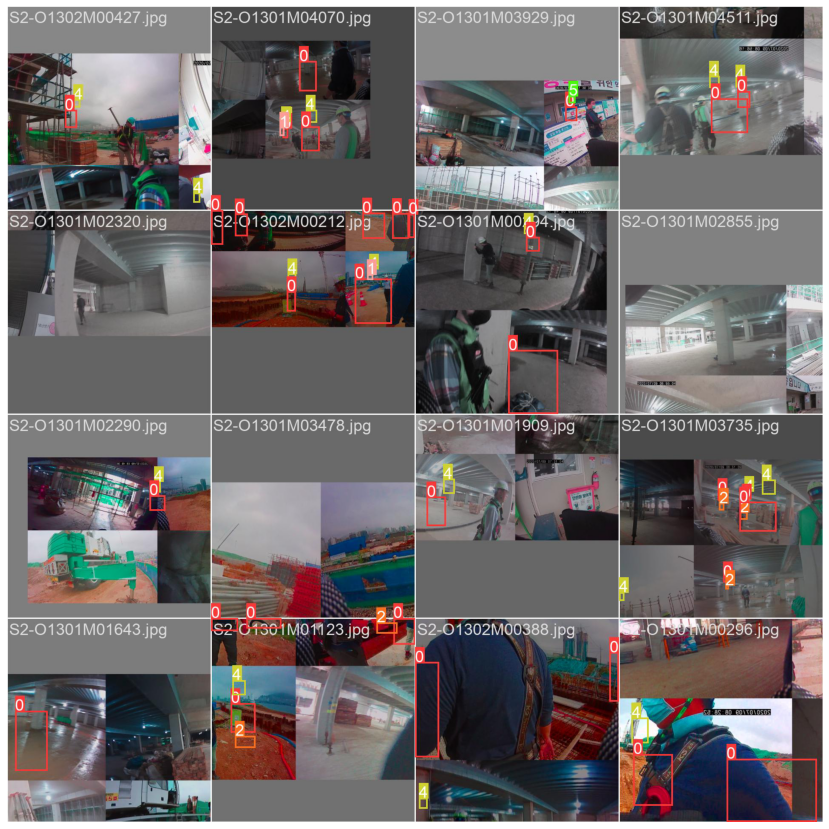

In [14]:
import matplotlib.pyplot as plt

img = plt.imread('/var/www/test/yolos/yolov5/runs/train/yolov5s_results/train_batch0.jpg')
plt.figure(figsize = (20, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

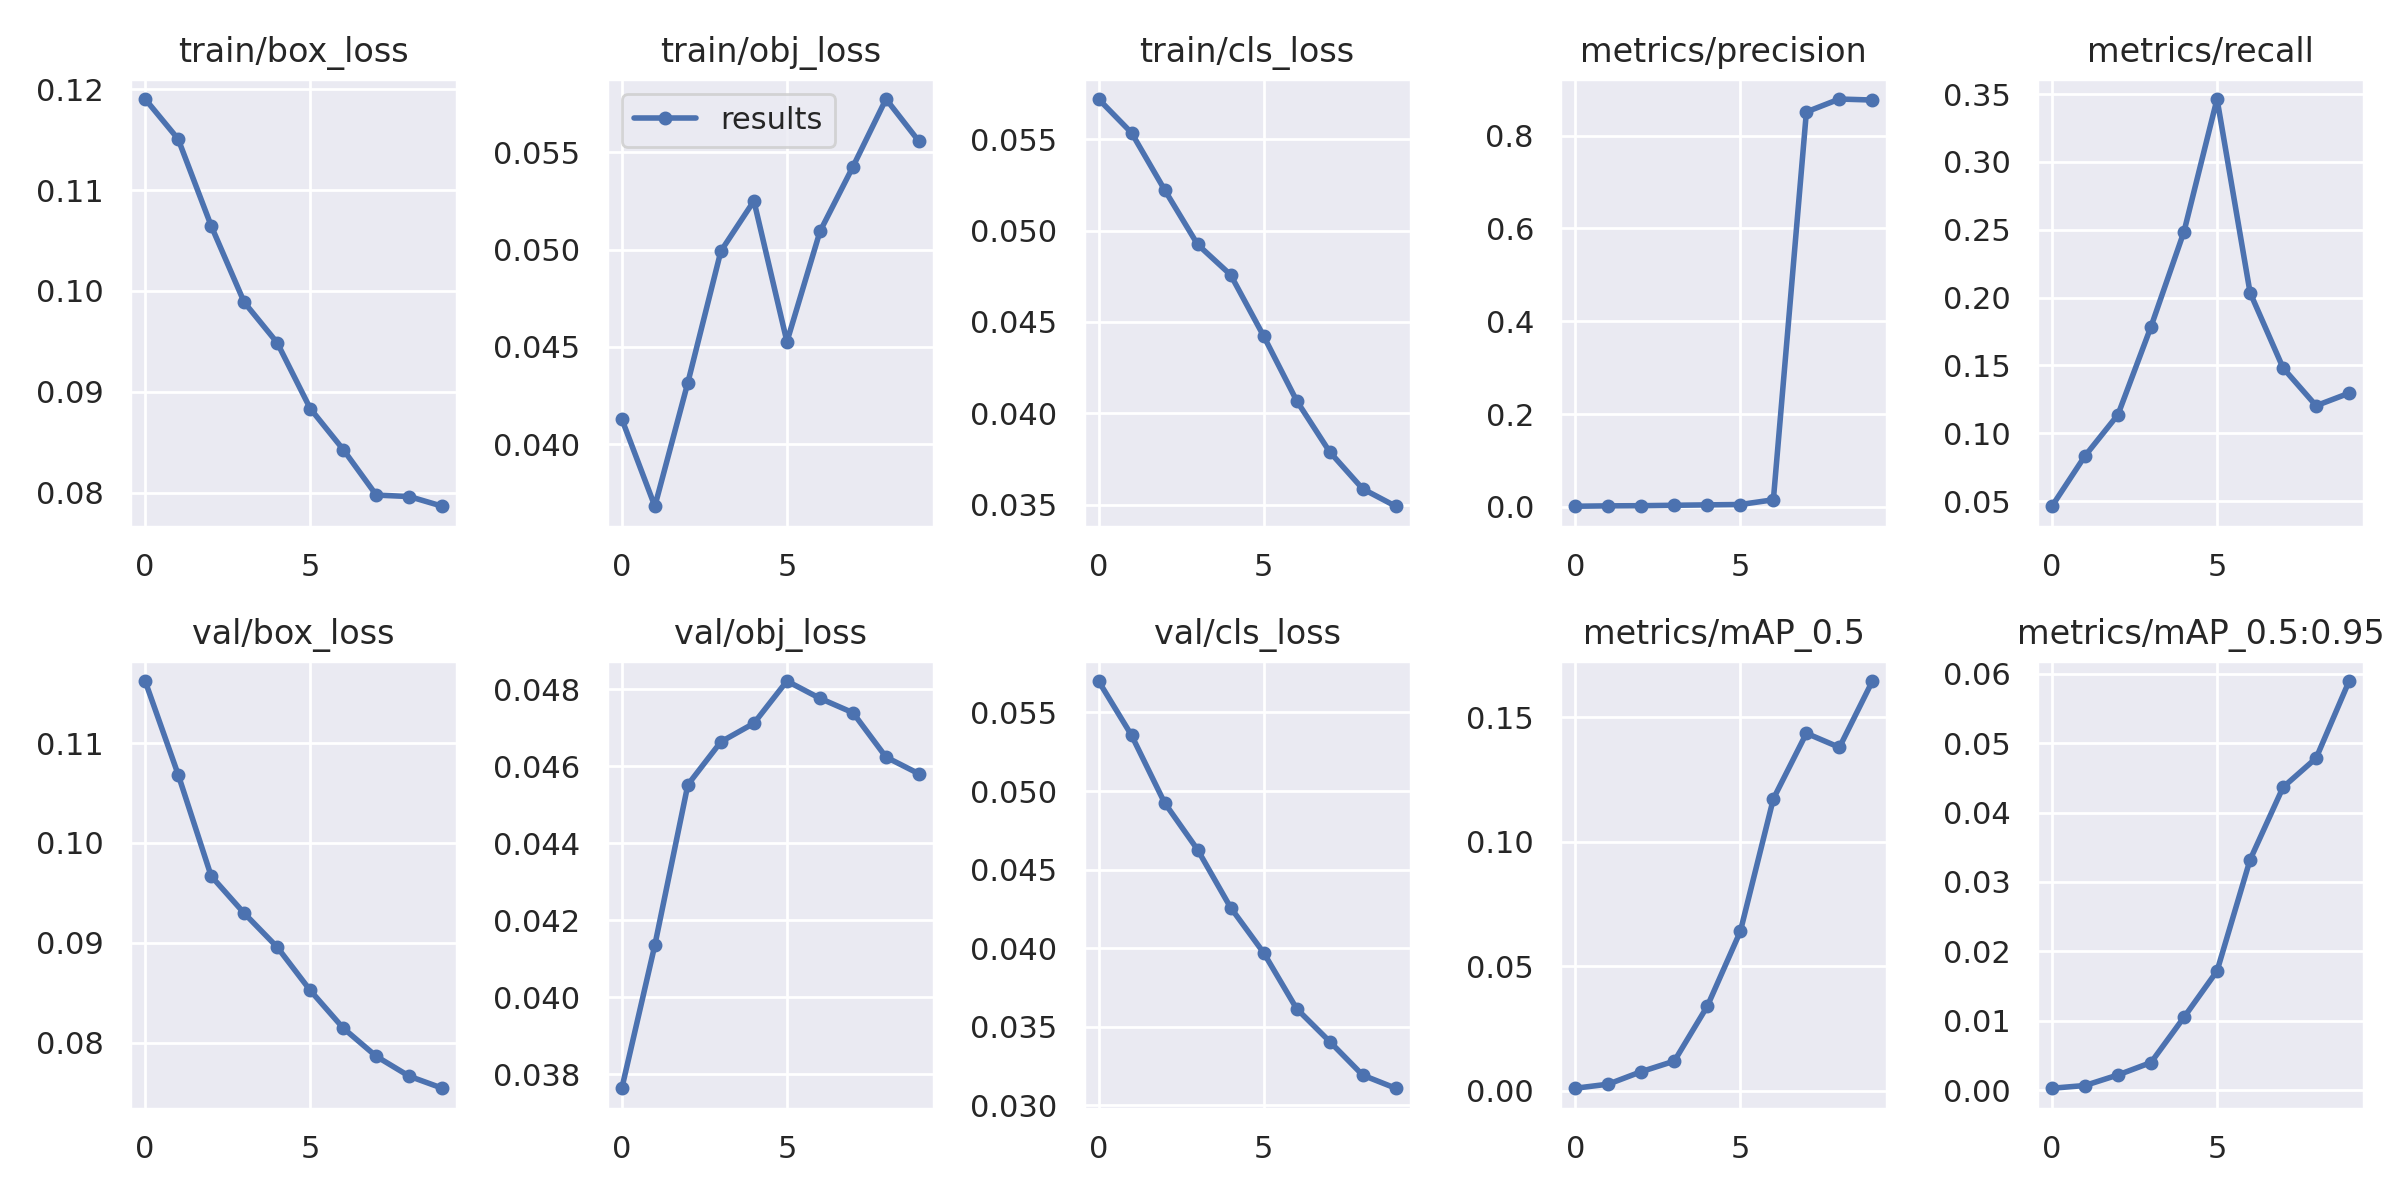

In [8]:
from IPython.display import Image

Image('/var/www/test/test_2/yolov5/runs/train/yolov5s_results/results.png')